In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()
#here month is coming as an object, we should convert it into datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
#always convert the time series column into datetime if its any other datatype
from datetime import datetime
from numpy import log
from pandas import Series

In [7]:
df['Month'] = pd.to_datetime(df['Month'])

In [8]:
df.head()
#dependent value is the passengers col and independent is the month col
#whenever you get month data, convert it into index value(we need only the month value, not the days)
#so convert the time into index number

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
df.set_index('Month', inplace=True)

In [10]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


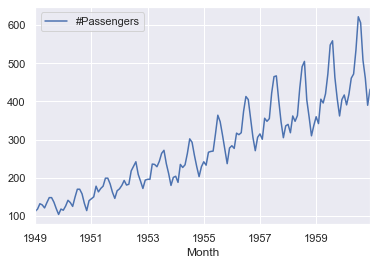

In [11]:
#Goal : to predict how many passenger will travel in that particular month in the upcoming years


#visualization
df.plot()

In [ ]:
#here there is an upward trend 

#to check for seasonality, trends etc do the decomposition checks

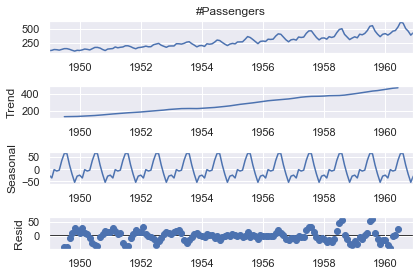

In [13]:
#Decomposition method

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['#Passengers'], period=12) #period = 12 because its monthly data
decomposition.plot()
plt.show()

In [ ]:
#the first graph is actual data
#we won't predict on resid(irregular/noisy) data

In [ ]:
#New dataset - Tractor Sales

In [15]:
tractor = pd.read_csv('Tractor-Sales.csv')
tractor.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [ ]:
#in excel we can a patter, we can see date=month-year and the dates keep fluctuating

In [17]:
tractor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


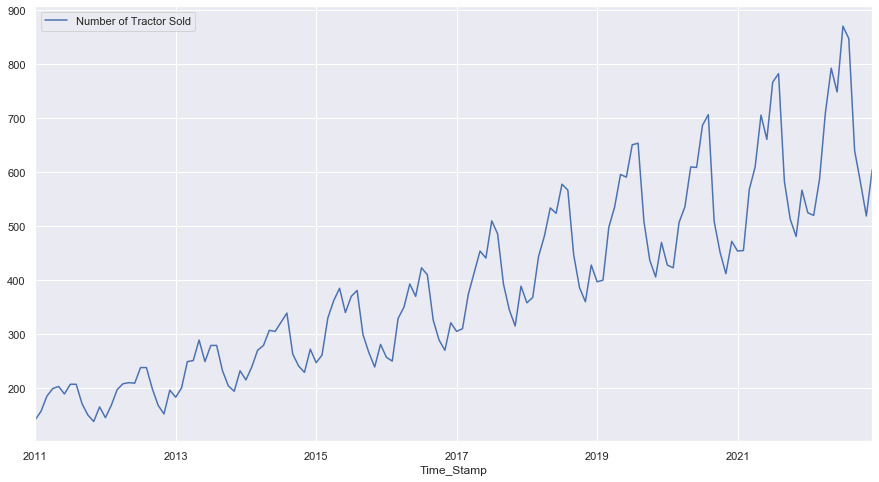

In [18]:
#here the time is in object dtype
#so we can either change the month-year to datetime like before
#or the following

timestamp = pd.date_range(start='2011-01-01',end='2023-01-01', freq='M')
tractor['Time_Stamp'] = timestamp
tractor.drop(labels = 'Month-Year', axis=1, inplace=True)
tractor.set_index(keys='Time_Stamp',drop=True,inplace=True)

from pylab import rcParams

rcParams['figure.figsize'] =15,8
tractor.plot(grid=True)

In [19]:
tractor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2011-01-31 to 2022-12-31
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Number of Tractor Sold  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


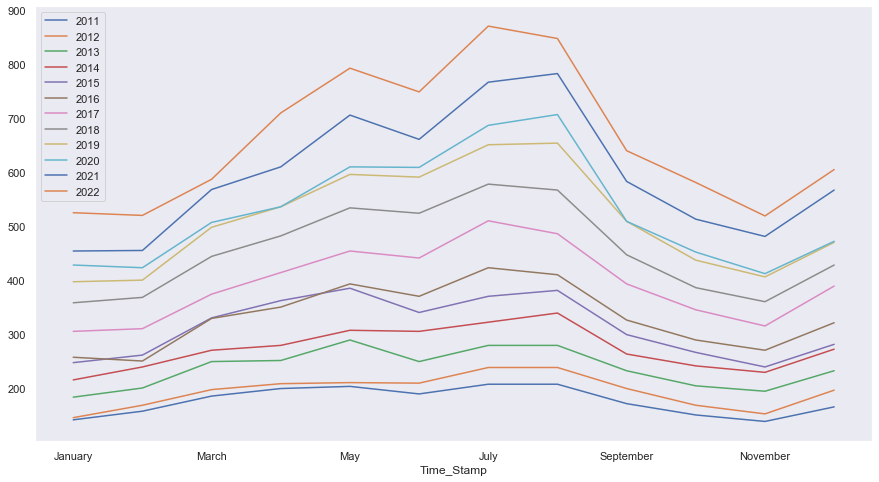

In [20]:
#Sales is increasing
#plot- seasonal plot year wise

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

yearly_sales_across_years = pd.pivot_table(tractor, values = 'Number of Tractor Sold', columns=tractor.index.year, index=tractor.index.month_name())
                                          
yearly_sales_across_years = yearly_sales_across_years.reindex(index=months)   
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best')
                                           
                                           
                                           
                                        

                                           
                                           
        
                                          

In [ ]:
#we are getting a trend
#in the month of July, the sales are highest across almost all years

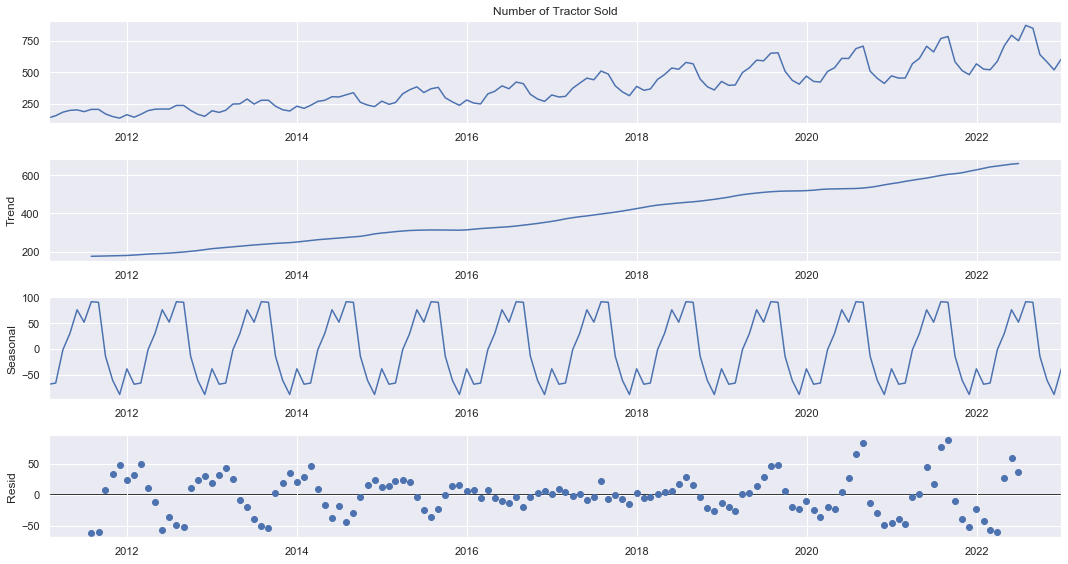

In [22]:
#additive model

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tractor['Number of Tractor Sold'], model='additive')
decomposition.plot()
plt.show()


In [ ]:
#the range of resid/noisy is -50 to 50

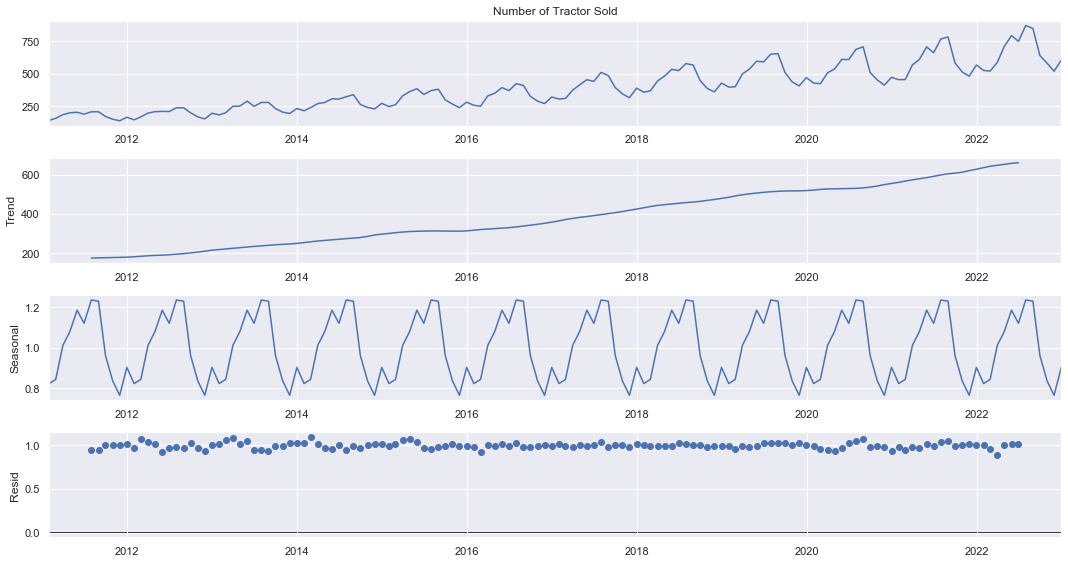

In [23]:
#multiplicative model

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tractor['Number of Tractor Sold'], model='multiplicative')
decomposition.plot()
plt.show()

In [ ]:
#the range of resid/noisy is around 1

In [ ]:
#original data is remain same, only seasonality and residual value get changed

In [ ]:
#to check the variance of seasonality and residual between additive and multiplicative



In [24]:
seasonal_ind = pd.DataFrame({'Jan': round(decomposition.seasonal.head(12),2).values[0],
                            'Feb': round(decomposition.seasonal.head(12),2).values[1],
                            'Mar': round(decomposition.seasonal.head(12),2).values[2],
                            'Apr': round(decomposition.seasonal.head(12),2).values[3],
                            'May': round(decomposition.seasonal.head(12),2).values[4],
                            'Jun': round(decomposition.seasonal.head(12),2).values[5],
                            'Jul': round(decomposition.seasonal.head(12),2).values[6],
                            'Aug': round(decomposition.seasonal.head(12),2).values[7],
                            'Sep': round(decomposition.seasonal.head(12),2).values[8],
                            'Oct': round(decomposition.seasonal.head(12),2).values[9],
                            'Nov': round(decomposition.seasonal.head(12),2).values[10],
                            'Dec': round(decomposition.seasonal.head(12),2).values[11]},
                           index = range(1,2))
seasonal_ind

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,0.82,0.84,1.01,1.08,1.19,1.12,1.24,1.23,0.96,0.84,0.77,0.9


In [ ]:
# it is being observed that the range is fluctuating